# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В  распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 


# Цель проекта
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


# Описание тарифов

**Тариф «Смарт»**

1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
-	минута разговора: 3 рубля
-	сообщение: 3 рубля
-	1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
-	минута разговора: 1 рубль
-	сообщение: 1 рубль
-	1 Гб интернет-трафика: 150 рублей

**Примечание:**

«Мегалайн» всегда округляет:
* секунды до минут, 
* мегабайты — до гигабайт. 
* каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. 
Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


# План выполнения проекта

# [Открыть файл с данными и изучить общую информацию](#step_1)
Данные в файлах:
-	информация о звонках: /datasets/calls.csv. 
-	информация об интернет-сессиях: /datasets/internet.csv.
-	информация о сообщениях: /datasets/messages.csv.
-	информация о тарифах: /datasets/tariffs.csv.
-   информация о пользователях: /datasets/users.csv.
-   Вывод



# [Подготовка данных](#step_2)

- Привести данные к нужным типам
- Найти и исправить ошибки в данных
- Посчитать для каждого пользователя:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя.
- Вывод по подготовке
    
# [Анализ данных](#step_3)

- Определить количество минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитать среднее количество, дисперсию и стандартное отклонение.
- Построить гистограммы, описать распределения.
- Вывод по анализу
    
# [Проверка гипотез](#step_4)

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

# [Написать общий вывод](#end)



## Открыть файл с данными и изучить общую информацию<a id='step_1'></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Прочитаем файлы
#информация о тарифах
tariffs = pd.read_csv('/datasets/tariffs.csv')
#информация об интернет-сессиях
#internet = pd.read_csv('/datasets/internet.csv')  
internet = pd.read_csv('/datasets/internet.csv',  index_col=0)
#информация о сообщениях
messages = pd.read_csv('/datasets/messages.csv')
#информация о звонках
calls = pd.read_csv('/datasets/calls.csv')
#информация о пользователях
users = pd.read_csv('/datasets/users.csv')

In [3]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Таблица tariffs (информация о тарифах):**
-	tariff_name — название тарифа
-	rub_monthly_fee — ежемесячная абонентская плата в рублях
-	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
-	messages_included — количество сообщений в месяц, включённых в абонентскую плату
-	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
-	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
-	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
-	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [4]:
#информация об интернет-сессиях
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [5]:
# Проверим количество уникальных пользователей
# 497 записей из 500 - видимо кто-то не пользуется интернетом
len(internet['user_id'].unique())

497

In [6]:
internet.duplicated().sum() # Наличие дублей

0

In [7]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Text(0.5, 1.0, 'График объема интернета')

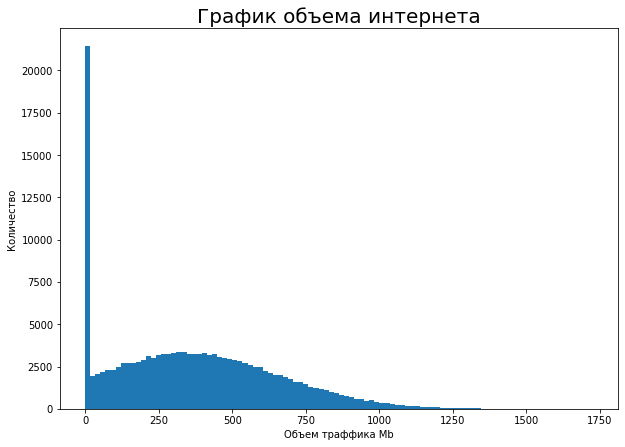

In [8]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(internet['mb_used'], bins = 100)
plt.xlabel('Объем траффика Mb')
plt.ylabel('Количество')
plt.title('График объема интернета', fontsize=20)

Text(0, 0.5, 'Количество')

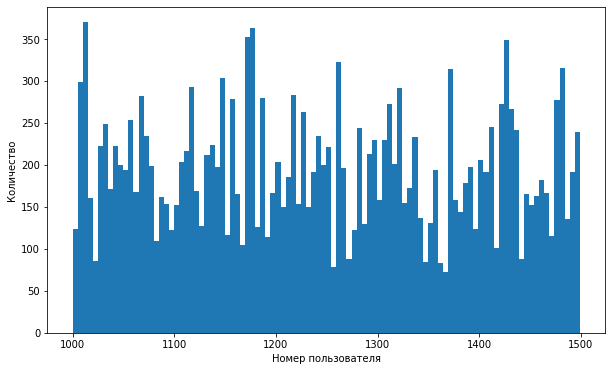

In [9]:
# очень много сессий с передачей данных, равной нулю
internet.query('mb_used == 0')['user_id'].plot(kind='hist', bins=100, figsize=(10,6))
plt.xlabel('Номер пользователя')
plt.ylabel('Количество')

Интернет сессии с нулевой передачей данных наблюдаются у каждого абонента.
Можно предположить, что это установка соединения, или регистрация устройства на сотовой вышке.


**Таблица internet (информация об интернет-сессиях):**
-	id — уникальный номер сессии
-	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-	session_date — дата интернет-сессии
-	user_id — идентификатор пользователя

* Таблица **internet** имеет 5 столбцов. 149396 записей.
* Пропусков данных нет
* Сомнительный столбец **Unnamed:0** - в нем повотряется номер строки - удаляем
* Столбец **session_date** приведем в тип данных datetime
* Дубликатов нет
* Есть нулевые данные по траффику интернета - кто-то не пользуется

In [10]:
#информация о сообщениях
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [11]:
# Проверим количество уникальных пользователей
# 426 из 500 пользуются смсками
len(messages['user_id'].unique())

426

In [12]:
messages.duplicated().sum() # Проверим наличие дубликатов

0


**Таблица messages (информация о сообщениях):**
-	id — уникальный номер сообщения
-	message_date — дата сообщения
-	user_id — идентификатор пользователя, отправившего сообщение


* Таблица содержит 3 столбца. 123036 строк. Пропусков данных нет
* Столбец **message_date** приведем в тип данных datetime
* Дубликатов нет

In [13]:
#информация о звонках
calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [14]:
# Проверим количество уникальных пользователей
# 492 из 500 - есть пользователи, которым не понадобилась связь
len(calls['user_id'].unique())

492

In [15]:
calls.duplicated().sum() # Проверим наличие дубликатов

0

In [16]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице **calls** 4 столбца с даными.
202607 значений
пропусков не наблюдается
* Столбец **call_date** приведем в тип данных datetime
* Дубликатов нет
* Есть звонки длительностью 0 минут - пропущенные скорее всего 
* Звноки округлить в большую сторону до минуты (тарификация кампании), после имзенить тип данных на целочисленный

**Таблица calls (информация о звонках):**
-	id — уникальный номер звонка
-	call_date — дата звонка
-	duration — длительность звонка в минутах
-	user_id — идентификатор пользователя, сделавшего звонок


In [17]:
#информация о пользователях
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [18]:
# Проверим количество уникальных пользователей
# Пользователи в наличии в полном объеме)
len(users['user_id'].unique())

500

In [19]:
users.duplicated().sum() # Проверим наличие дубликатов

0

**Таблица users (информация о пользователях):**
-	user_id — уникальный идентификатор пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	age — возраст пользователя (годы)
-	reg_date — дата подключения тарифа (день, месяц, год)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	tariff — название тарифного плана

В таблице 8 колонок, 500 строк с данными, имеются пропуски в столце **churn_date** — дата прекращения пользования тарифом - тариф еще действует
* Столбец **reg_date** приведем в тип данных datetime
* Столбец **churn_date** приведем в тип данных datetime
* Дубликатов нет

**Вывод по данным в наличии:**

Имеем 5 таблиц с данными. Во всех таблицах имеется столбец с датой. В них будет произведена замена типа данных на **Datetime**

Пропусков данных не наблюдается, кроме столбца **churn_date**, который содержит информацию о дате прекращения пользования тарифом. Такой пропуск означает действующий контракт.

Есть звонки с нулевой длительностью - пропущенные 


~~В таблице **internet** есть сомнительный столбец **Unnamed:0** - в нем повотряется номер строки - удаляем.~~
После правки команды чтения данных из файла **internet.csv** не придется производить удаление столбца

Также в таблице **internet** имеются данные о неиспользованном траффике - кто-то не пользуется интернетом.
Также есть много значений с нулевым траффиком - есть предположение, что это установка соединеня при преходе от одной базовой станции к другой

Так же есть абоненты с неиспользованным пакетом смс

Дубликаты в  таблицах не обнаружены

## Подготовка данных <a id='step_2'></a>

### Приводим данные к нужным типам

In [20]:
# Меняем тип данных Datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # 
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [21]:
# в таблице calls округляем длительность звонков до минут в большую сторону, после меняем тип данных на int
# calls['duration'] = calls['duration'].apply(np.ceil).astype(int) 
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Найти и исправить ошибки в данных

In [22]:
# удалим столбец Unnamed:0 из таблицы internet
#internet = internet.drop('Unnamed: 0',axis=1)
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


### Посчитать для каждого пользователя:

#### количество сделанных звонков и израсходованных минут разговора по месяцам;


In [23]:
#Добавим в каждый датасет по столбцу month для удобства расчета
calls['month'] = calls['call_date'].dt.month # месяц совершения звонка
internet['month'] = internet['session_date'].dt.month # месяцо интернет сессии
messages['month'] = messages['message_date'].dt.month # месяц отправки сообщения
users['churn_month'] = users['churn_date'].dt.month # месяц расторжения контракта
users['reg_month'] = users['reg_date'].dt.month # месяц регистрации контракта

In [24]:
# Сводная таблица по звонкам каждого пользователя за месяц
calls_at_month = calls.pivot_table(
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['count', 'sum']
)
calls_at_month.columns = ['calls', 'duration'] # переименуем столбцы
calls_at_month

calls  duration
user_id month                 
1000    5         22       159
        6         43       172
        7         47       340
        8         52       408
        9         58       466
...              ...       ...
1498    10        41       247
1499    9          9        70
        10        68       449
        11        74       612
        12        69       492

[3174 rows x 2 columns]

#### количество отправленных сообщений по месяцам;


In [25]:
#сводная таблица по cмскам за месяц у пользователя
messages_at_month = messages.pivot_table(
    index = ['user_id', 'month'],
    values = 'id',
    aggfunc = ['count']
)

messages_at_month.columns = ['messages_count'] # переименуем столбцы
messages_at_month

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

#### объем израсходованного интернет-трафика по месяцам;


In [26]:
# Израсходованный траффик интрнета
internet_at_month = internet.pivot_table(
    index=['user_id','month'],
    values='mb_used',
    aggfunc=['count', 'sum']
)
internet_at_month.columns = ['session_count', 'mb_sum'] #  переименуем столбцы
internet_at_month

session_count    mb_sum
user_id month                         
1000    5                  5   2253.49
        6                 49  23233.77
        7                 29  14003.64
        8                 29  14055.93
        9                 27  14568.91
...                      ...       ...
1498    10                59  20579.36
1499    9                  5   1845.75
        10                58  17788.51
        11                49  17963.31
        12                45  13055.58

[3203 rows x 2 columns]

In [27]:
# округляем мегабайты в большую сторону
#internet_at_month['mb_sum'] = internet_at_month['mb_sum'].apply(np.floor).astype(int)
#internet_at_month

#### помесячная выручку с каждого пользователя.


In [28]:
# Сделаем новый датафрейм, в котором по пользователям будут объединенные данные
# склеим звонки с  сообщениями и интернет траффиком, индекс в этих таблицах (user_id, month)
# в методе join применим внешний тип слияния how='outer'- для объединения данных трех таблиц
data = calls_at_month.join([messages_at_month, internet_at_month], how='outer')
#data.sample(5)
data = data.reset_index(drop=False)
data

,user_id,month,calls,duration,messages_count,session_count,mb_sum
0,1000,5,22.0,159.0,22.0,5.0,2253.49
1,1000,6,43.0,172.0,60.0,49.0,23233.77
2,1000,7,47.0,340.0,75.0,29.0,14003.64
3,1000,8,52.0,408.0,81.0,29.0,14055.93
4,1000,9,58.0,466.0,57.0,27.0,14568.91
...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,59.0,20579.36
3210,1499,9,9.0,70.0,11.0,5.0,1845.75
3211,1499,10,68.0,449.0,48.0,58.0,17788.51
3212,1499,11,74.0,612.0,59.0,49.0,17963.31


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls           3174 non-null   float64
 3   duration        3174 non-null   float64
 4   messages_count  2717 non-null   float64
 5   session_count   3203 non-null   float64
 6   mb_sum          3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 175.9 KB


In [30]:
# вспомним, какие данные есть в таблице с пользователями для склейки
# 
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,NaN,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,5


In [31]:
# Проверим количество уникальных значений в столбце user_id - чтобы не было потеряшек
len(data['user_id'].unique())


498

In [32]:

# теперь добавим в датасет данные о пользователе
# data = data.merge(users, on='user_id', how='left') было
# исправленный вариант
data = data.merge(users, on='user_id', how='outer')

In [33]:
#Снова проверим наличие отсутствия потеряшек
len(data['user_id'].unique())


500

In [34]:
# теперь добавим в датасет данные о тарифе
data = data.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')
data.sample(10) # посмотрим результат склеек

,user_id,month,calls,duration,messages_count,session_count,mb_sum,age,churn_date,city,...,churn_month,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1931,1303,11.0,70.0,563.0,32.0,36.0,18243.36,36,NaT,Смоленск,...,NaN,7,1000,30720,3000,1950,150,1,1,ultra
1135,1177,9.0,61.0,409.0,NaN,55.0,16784.98,75,NaT,Новосибирск,...,NaN,6,50,15360,500,550,200,3,3,smart
1196,1186,7.0,88.0,589.0,54.0,32.0,8714.63,21,NaT,Самара,...,NaN,2,50,15360,500,550,200,3,3,smart
2673,1416,12.0,50.0,363.0,44.0,21.0,9998.83,50,2018-12-14,Санкт-Петербург,...,12.0,7,1000,30720,3000,1950,150,1,1,ultra
2271,1359,12.0,108.0,726.0,22.0,49.0,17609.31,52,NaT,Москва,...,NaN,7,50,15360,500,550,200,3,3,smart
3200,1496,10.0,72.0,450.0,35.0,84.0,28183.17,36,NaT,Вологда,...,NaN,1,50,15360,500,550,200,3,3,smart
1005,1158,2.0,45.0,371.0,55.0,36.0,12715.60,45,NaT,Новокузнецк,...,NaN,2,50,15360,500,550,200,3,3,smart
2251,1357,9.0,42.0,342.0,48.0,64.0,14566.16,37,NaT,Томск,...,NaN,9,50,15360,500,550,200,3,3,smart
2409,1378,12.0,90.0,563.0,7.0,37.0,13741.03,21,NaT,Иркутск,...,NaN,1,50,15360,500,550,200,3,3,smart
1682,1266,8.0,50.0,305.0,37.0,49.0,16415.88,32,NaT,Калуга,...,NaN,7,50,15360,500,550,200,3,3,smart


In [35]:
# проверим на пропуски
data.isna().sum()

user_id                     0
month                       2
calls                      42
duration                   42
messages_count            499
session_count              13
mb_sum                     13
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
churn_month              3027
reg_month                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Пропуски в наличии

In [36]:
# Уберем пропуски в звонках, смсках и мегабайтах заменив их на нули
data['calls'] = data['calls'].fillna(0)
data['duration'] = data['duration'].fillna(0)
data['messages_count'] = data['messages_count'].fillna(0)
data['mb_sum'] = data['mb_sum'].fillna(0)

In [37]:
#Пропуски убраны, заменены нулями
data.isna().sum()

user_id                     0
month                       2
calls                       0
duration                    0
messages_count              0
session_count              13
mb_sum                      0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
churn_month              3027
reg_month                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

In [38]:
#Округлим мегабайты в Гигабайты
data['gb_sum'] = np.ceil(data['mb_sum']/1024) # Согласно тарифу округляем до гигабайт в большую сторону
data['gb_per_month_included'] = data['mb_per_month_included']/1024
data.sample(10)

,user_id,month,calls,duration,messages_count,session_count,mb_sum,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_sum,gb_per_month_included
1592,1251,2.0,26.0,206.0,45.0,45.0,14556.77,48,NaT,Пермь,...,50,15360,500,550,200,3,3,smart,15.0,15.0
873,1138,8.0,107.0,859.0,3.0,83.0,28836.37,23,NaT,Екатеринбург,...,50,15360,500,550,200,3,3,smart,29.0,15.0
1774,1281,7.0,72.0,508.0,71.0,32.0,17450.89,62,NaT,Нижний Новгород,...,1000,30720,3000,1950,150,1,1,ultra,18.0,30.0
2254,1357,12.0,42.0,321.0,33.0,58.0,17946.56,37,NaT,Томск,...,50,15360,500,550,200,3,3,smart,18.0,15.0
888,1142,9.0,60.0,465.0,33.0,54.0,13114.39,51,NaT,Новосибирск,...,50,15360,500,550,200,3,3,smart,13.0,15.0
1281,1200,8.0,92.0,627.0,49.0,33.0,16303.33,36,NaT,Санкт-Петербург,...,1000,30720,3000,1950,150,1,1,ultra,16.0,30.0
102,1014,7.0,40.0,300.0,39.0,79.0,27823.59,64,NaT,Чебоксары,...,50,15360,500,550,200,3,3,smart,28.0,15.0
2485,1389,12.0,42.0,292.0,1.0,53.0,16807.56,29,NaT,Москва,...,50,15360,500,550,200,3,3,smart,17.0,15.0
2842,1440,8.0,35.0,185.0,103.0,51.0,25494.77,51,NaT,Москва,...,1000,30720,3000,1950,150,1,1,ultra,25.0,30.0
539,1086,6.0,62.0,467.0,23.0,69.0,25558.94,73,NaT,Волгоград,...,50,15360,500,550,200,3,3,smart,25.0,15.0


In [39]:
# Посмотрим наличие дубликатов
data.duplicated().sum()

0

In [40]:
# Добавим функцию,которая при вызове буде считать переплату в рублях, если она есть
# если переплаты нет, тогда будет возвращен 0
def overpayment(value):
# Перепутал столбцы 'calls' и 'duration'
#    minutes = (value['calls'] - value['minutes_included']) * value['rub_per_minute']
    minutes = (value['duration'] - value['minutes_included']) * value['rub_per_minute']    
    sms = (value['messages_count'] - value['messages_included']) * value['rub_per_message']
    mbps = (value['gb_sum'] - value['gb_per_month_included']) * value['rub_per_gb']
    count_overpay = 0
    for i in [minutes, sms, mbps]:
        if i > 0:
            count_overpay += i
#    print(count_overpay)
    return count_overpay

In [41]:
# переплаты имеются н находятся в столбце overpayment_tariff
data['overpayment_tariff'] = data.apply(lambda x: overpayment(x), axis=1)
data['overpayment_tariff'].sample(5) #несколько значений для проверки на наличие данных

2309       0.0
1649     400.0
280      445.0
1644    1116.0
2176    1283.0
Name: overpayment_tariff, dtype: float64

In [42]:
# добавим столбец с итоговой стоимостью услуг за месяц с учетом переплат
data['total_pay']= data['rub_monthly_fee'] + data['overpayment_tariff']

In [43]:
# посмотрим 10 случайных строк из data
# столбцы с данными об оплате имеются
data.sample(10)

,user_id,month,calls,duration,messages_count,session_count,mb_sum,age,churn_date,city,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_sum,gb_per_month_included,overpayment_tariff,total_pay
2378,1375,12.0,124.0,858.0,75.0,41.0,21544.34,53,NaT,Пенза,...,3000,1950,150,1,1,ultra,22.0,30.0,0.0,1950.0
1406,1220,11.0,28.0,236.0,0.0,18.0,6459.93,59,NaT,Ростов-на-Дону,...,500,550,200,3,3,smart,7.0,15.0,0.0,550.0
3173,1492,7.0,80.0,517.0,19.0,55.0,15212.45,63,NaT,Санкт-Петербург,...,500,550,200,3,3,smart,15.0,15.0,51.0,601.0
2341,1372,8.0,65.0,466.0,24.0,41.0,13872.15,71,NaT,Магнитогорск,...,500,550,200,3,3,smart,14.0,15.0,0.0,550.0
2648,1413,8.0,10.0,63.0,3.0,26.0,8760.97,37,NaT,Новосибирск,...,500,550,200,3,3,smart,9.0,15.0,0.0,550.0
1276,1199,12.0,120.0,890.0,66.0,27.0,10574.17,27,NaT,Чебоксары,...,500,550,200,3,3,smart,11.0,15.0,1218.0,1768.0
2678,1417,11.0,47.0,369.0,81.0,42.0,16537.75,34,NaT,Тольятти,...,500,550,200,3,3,smart,17.0,15.0,493.0,1043.0
689,1109,3.0,66.0,426.0,1.0,44.0,14502.70,64,NaT,Санкт-Петербург,...,500,550,200,3,3,smart,15.0,15.0,0.0,550.0
563,1089,9.0,68.0,477.0,137.0,23.0,10933.27,19,NaT,Иркутск,...,3000,1950,150,1,1,ultra,11.0,30.0,0.0,1950.0
2017,1318,9.0,94.0,662.0,56.0,19.0,9050.08,53,NaT,Курган,...,3000,1950,150,1,1,ultra,9.0,30.0,0.0,1950.0


### Вывод по подготовке


- Данные были приведены к нужным типам.
- Так как расчеты за услуги идут помесячно, был добавлен для удобства расчетов столбец с номером месяца
- Звонки были округлены до минут согласно тарифам оператора
- Исправлены ошибки в таблице internet
- Созданы сводные таблицы по звонкам, смскам, траффику интернета. по каждому пользователю за месяц
- Мегабайты пересчитаны в Гигабайты с округлением в большую сторону за месяц
- Написана функция, с помощью которой посчитана переплата сверх тарифа
- Сделан датасет, в котором посчитана выручка и переплата по каждому пользователю на основе созданных ранее сводных таблиц


In [44]:
# check
data['total_pay'].sum()

4916951.0

In [45]:
# check
data[data ['duration'] > 500][['user_id', 'month', 'duration', 'messages_count',
       'mb_sum', 'reg_date', 'tariff', 'tariff_name', 'gb_sum', 'gb_per_month_included', 'overpayment_tariff',
       'total_pay']].tail(4)

,user_id,month,duration,messages_count,mb_sum,reg_date,tariff,tariff_name,gb_sum,gb_per_month_included,overpayment_tariff,total_pay
3201,1496,11.0,662.0,46.0,25063.40,2018-01-27,smart,smart,25.0,15.0,2486.0,3036.0
3202,1496,12.0,518.0,51.0,20736.15,2018-01-27,smart,smart,21.0,15.0,1257.0,1807.0
3205,1497,12.0,545.0,17.0,19918.60,2018-10-09,smart,smart,20.0,15.0,1135.0,1685.0
3212,1499,11.0,612.0,59.0,17963.31,2018-09-27,smart,smart,18.0,15.0,963.0,1513.0


## Анализ данных

### Опишите поведение клиентов оператора, исходя из выборки. 
Потребности пользователей каждого тарифа в месяц

In [46]:
# Посмотрим информацию по датасету в целом
data[['overpayment_tariff','total_pay']].describe()
# Среднее значение переплаты за месяц 550 руб, а средня оплата по тарифу 1528,9 руб!

,overpayment_tariff,total_pay
count,3216.000000,3216.000000
mean,549.673818,1528.902674
std,767.655172,798.224060
min,0.000000,550.000000
25%,0.000000,750.000000
50%,159.000000,1653.500000
75%,938.000000,1950.000000
max,6220.000000,6770.000000


In [47]:
# Посмотрим сводную таблицу по тарифам
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'minutes_included', 'messages_count', 'messages_included', 'gb_sum', 'gb_per_month_included','total_pay', 'rub_monthly_fee'],
    aggfunc = ['mean']

).style.format('{0:.2f}')


В среднем видно по тарифу Смарт:

- Минуты среднее значение 418 минут, в пакете включено 500
- Смски 34  шт, в пакете включено 50
- Интернет 16.32 Гб в пакете 15 (интерент докупается)

По тарифу Ультра:
- Минут среднее значение 527, в пакете 3000
- Смски 50, в пакете 1000
- Интернет 19,47 Гб, в пакете 30 Гб

Пользователи тарифа Смарт докупают недостающий траффик, в то время, как пользователям тарифа Ультра в среднем хватает пакета услуг на месяц

In [48]:
# посмотрим оплаченную сумму по тарифам
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'messages_count', 'gb_sum', 'total_pay', 'overpayment_tariff'],
    aggfunc = ['sum']

).style.format('{0:.2f}')


Из таблицы видно в среднем по тарифу:

Smart: минуты с
верх пакета не выговаривают, смски сверх пакета не используют, траффик интернета в среднем превышают на 1.3 Гб

Ultra: Минуты сверх пакета не расходуют, смски тоже в не расходуют, траффик интернета тоже расходуется в пределах пакета.
Но при этом по среднему значению имеется переплата двукратная по тарифу Smart

Но суммарно за год выручки с тарифа Смарт больше, нежели с тарифа Ультра

Text(0.5, 1.0, 'Оплата по тарифам')

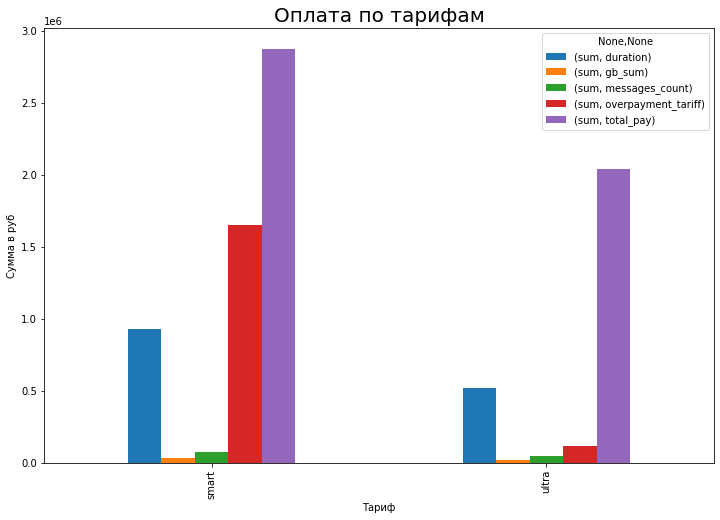

In [49]:
# посмотрим оплаченную сумму по тарифам
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'messages_count', 'gb_sum', 'total_pay', 'overpayment_tariff'],
    aggfunc = ['sum']

).plot(kind='bar', figsize=(12, 8))
plt.xlabel('Тариф')
plt.ylabel('Сумма в руб')
plt.title('Оплата по тарифам', fontsize=20)


Text(0.5, 1.0, 'Оплата по тарифам')

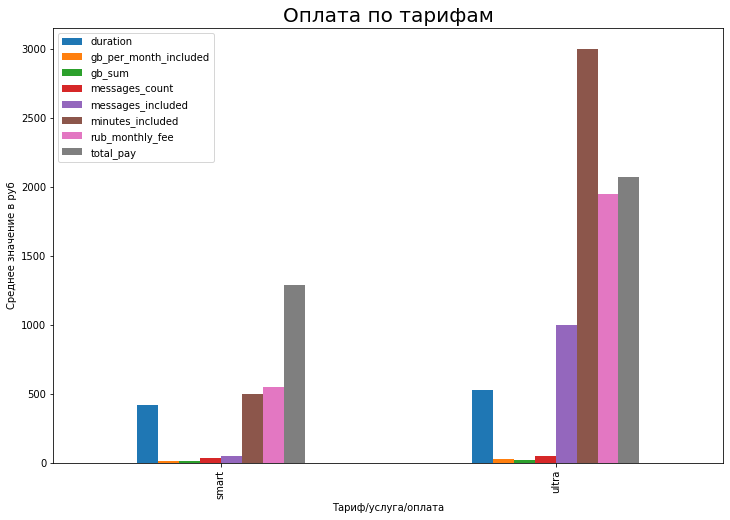

In [50]:
# Графическое представление
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'minutes_included', 'messages_count', 'messages_included', 'gb_sum', 'gb_per_month_included','total_pay', 'rub_monthly_fee']
).plot(kind='bar', figsize=(12, 8))
plt.xlabel('Тариф/услуга/оплата')
plt.ylabel('Среднее значение в руб')
plt.title('Оплата по тарифам', fontsize=20)


Из графиков наглядно видно, что в итоге пользователи тарифа Smart в среднем переплачивают за пользование услугами сверх пакета.
Пользователи тарифа Ultra в среднем тоже переплачивают, но незначительно.


In [51]:
# Посмотрим сводную таблицу по тарифам и по месяцам
data.pivot_table(
    index = ['tariff','month'],
    values = ['duration', 'minutes_included', 'messages_count', 'messages_included', 'gb_sum', 'gb_per_month_included','total_pay', 'rub_monthly_fee'],
    aggfunc = ['mean']

).style.format('{0:.2f}')

In [52]:
data.pivot_table(
    index = ['tariff'],
    values = ['duration', 'minutes_included', 'messages_count', 'messages_included', 'gb_sum', 'gb_per_month_included','total_pay', 'rub_monthly_fee'],
    aggfunc = ['sum','mean']

).style.format('{0:.2f}')

#### Сколько минут разговора 

In [53]:
(
data.pivot_table(
    index='tariff',
    values = ['duration', 'minutes_included'],
    aggfunc = ['mean','median']
                )
#    .plot(kind='bar')
)

mean                    median                 
          duration minutes_included duration minutes_included
tariff                                                       
smart   417.747534              500    421.5              500
ultra   526.089249             3000    518.0             3000

Text(0.5, 1.0, 'Минуты')

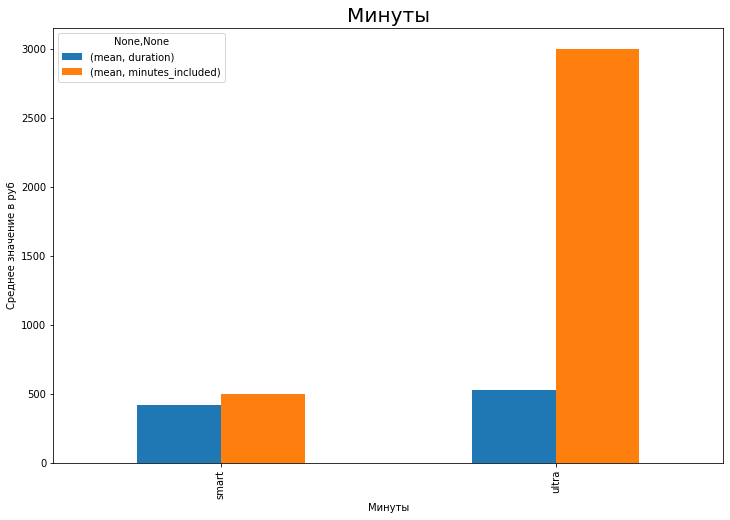

In [54]:
(
data.pivot_table(
    index='tariff',
    values = ['duration', 'minutes_included'],
    aggfunc = ['mean']
                )
    .plot(kind='bar',  figsize=(12, 8))
)
plt.xlabel('Минуты')
plt.ylabel('Среднее значение в руб')
plt.title('Минуты', fontsize=20)

пользователи в среднем не превышают пакет минут

#### сколько сообщений 

In [55]:
# 
(
data.pivot_table(
    index='tariff',
    values = ['messages_count', 'messages_included'],
    aggfunc = ['mean','median']
                )
#    .plot(kind='bar')
)

mean                           median                  
       messages_count messages_included messages_count messages_included
tariff                                                                  
smart       33.369058                50           28.0                50
ultra       49.313387              1000           38.0              1000

не удивительно, но смсок в пакете пользователям тоже хватает на обоих тарифах

#### какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

In [56]:
(
data.pivot_table(
    index='tariff',
    values = ['gb_sum', 'gb_per_month_included'],
    aggfunc = ['mean','median']
                )
#    .plot(kind='bar')
)

mean                           median       
       gb_per_month_included     gb_sum gb_per_month_included gb_sum
tariff                                                              
smart                   15.0  16.321525                  15.0   17.0
ultra                   30.0  19.474645                  30.0   19.0

Text(0.5, 1.0, 'Смски')

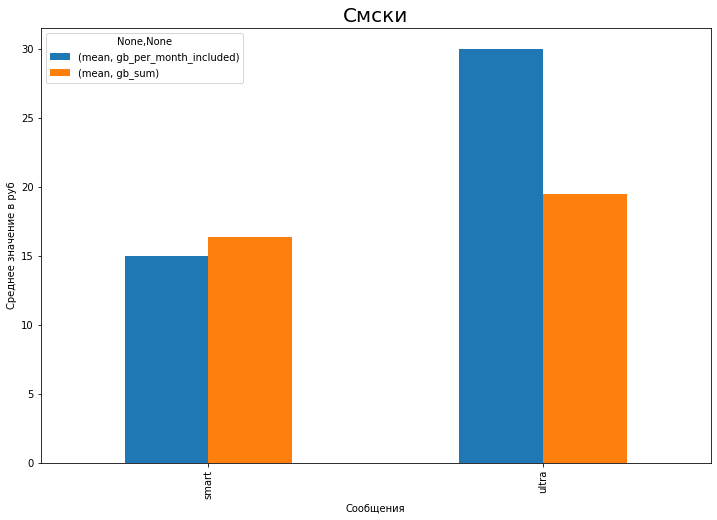

In [57]:
(
data.pivot_table(
    index='tariff',
    values = ['gb_sum', 'gb_per_month_included'],
    aggfunc = ['mean']
                )
    .plot(kind='bar',  figsize=(12, 8))
)
plt.xlabel('Сообщения')
plt.ylabel('Среднее значение в руб')
plt.title('Смски', fontsize=20)

Пользователям тарифа Смарт не хватает пакета мегабайт, им приходится докупать

Пользователи тарифа Ультра в общей своей массе не превышают пакета интрернет траффика




### Статистики

#### среднее количество

In [58]:
# Посмотрим среднее значение по минутам, смскам и гигабайтам для каждого тарифа
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'minutes_included', 'messages_count', 'messages_included', 'gb_sum', 'gb_per_month_included'],
    aggfunc = ['mean']

).style.format('{0:.2f}')


####  дисперсия


In [59]:
# опередлим дисперсии 
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'messages_count','gb_sum', 'total_pay'],
    aggfunc = ['var']
).style.format('{0:.2f}')


#### стандартное отклонение. 


In [60]:
data.pivot_table(
    index = 'tariff',
    values = ['duration', 'messages_count','gb_sum','total_pay'],
    aggfunc = ['std']

).style.format('{0:.2f}')

### Постройте гистограммы. 

#### Гистограммы по оплате

Text(0.5, 1.0, 'Распределение оплаты в мес')

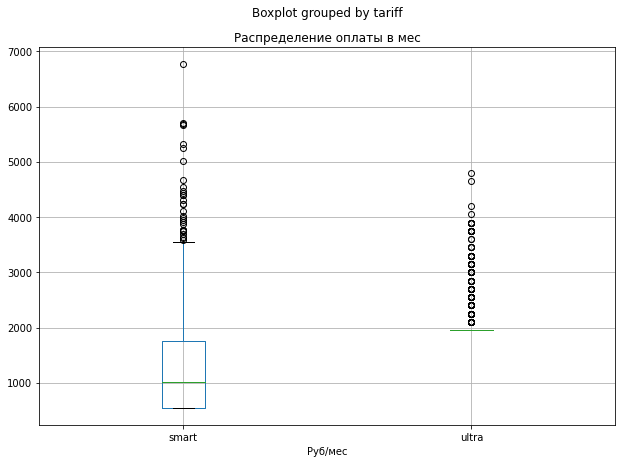

In [61]:
#sns.catpplt.grid(lot(x='tariff', y='total_pay', kind="box", data=data)
data.boxplot('total_pay', by='tariff', figsize=(10,7))
plt.xlabel('Руб/мес')
plt.title('Распределение оплаты в мес')

Медианное значение по оплате у тарифа ультра больше, чем у смарта примерно в два раза, можно сказать, что тариф ультра выгоднее для оператора связи.

<AxesSubplot:ylabel='Frequency'>

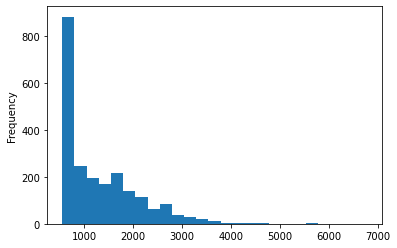

In [62]:
# Гистограмма по оплате, тариф Смарт
data.query('tariff == "smart"')['total_pay'].plot(kind='hist', bins=25)

In [63]:
data.query('tariff == "smart"')['total_pay'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: total_pay, dtype: float64

Пользователи тарифа Смарт часто вылезают из пакетов услуг и докупают их

<AxesSubplot:ylabel='Frequency'>

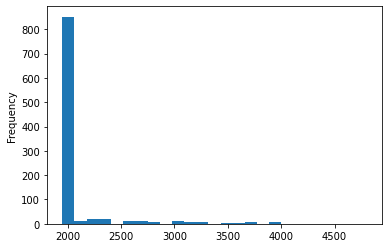

In [64]:
# Гистограмма по оплате, тариф Ультра
data.query('tariff == "ultra"')['total_pay'].plot(kind='hist', bins=25)

In [65]:
data.query('tariff == "ultra"')['total_pay'].describe()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_pay, dtype: float64

Можно сказать, что пользователям тарифа Ультра хватает пакетов услуг, включенных в тариф.


#### Гистограмма по минутам

<AxesSubplot:ylabel='Frequency'>

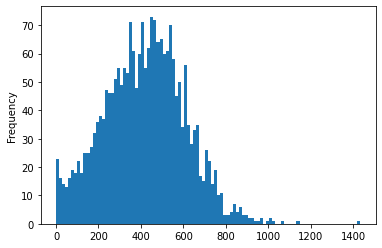

In [66]:
# Гистограмма по использованым минутам, тариф Смарт
data.query('tariff == "smart"')['duration'].plot(kind='hist', bins=100)

In [67]:
data.query('tariff == "smart"')['duration'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

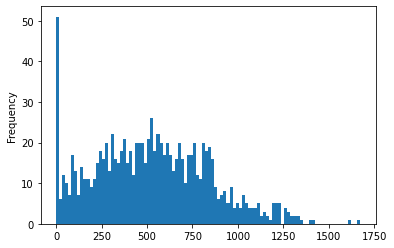

In [68]:
data.query('tariff == "ultra"')['duration'].plot(kind='hist', bins=100)

Из гистограмм видны нулевые значения расходования пакета минут - есть пользователи, которые не пользуются связью

In [69]:
data.query('tariff == "ultra"')['duration'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration, dtype: float64

Text(0.5, 1.0, 'Распределение минут в мес')

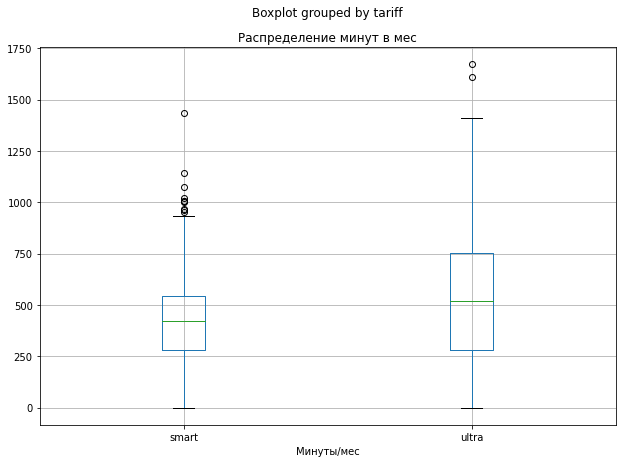

In [70]:
data.boxplot('duration', by='tariff', figsize=(10,7))
plt.xlabel('Минуты/мес')
plt.title('Распределение минут в мес')

#### Гистограмма по смскам

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

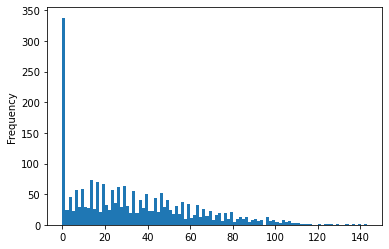

In [71]:
data.query('tariff == "smart"')['messages_count'].plot(kind='hist', bins=100)
data.query('tariff == "smart"')['messages_count'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

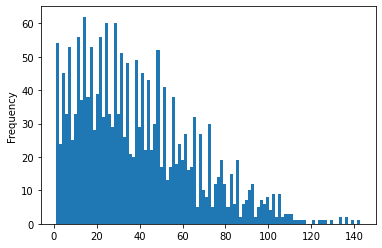

In [72]:
data.query('tariff == "smart" and messages_count>0')['messages_count'].plot(kind='hist', bins=100)
data.query('tariff == "smart" and messages_count>0')['messages_count'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_count, dtype: float64

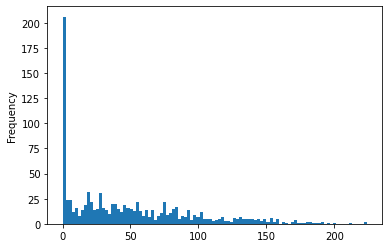

In [73]:
data.query('tariff == "ultra"')['messages_count'].plot(kind='hist', bins=100)
data.query('tariff == "ultra"')['messages_count'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_count, dtype: float64

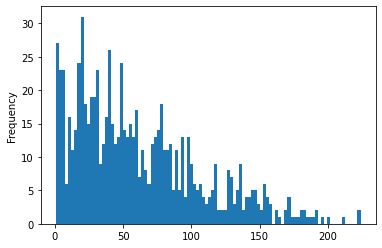

In [74]:
data.query('tariff == "ultra" and messages_count > 0')['messages_count'].plot(kind='hist', bins=100)
data.query('tariff == "ultra"')['messages_count'].describe()

На обеих гистограммах видны пики у нулевых значений - есть пользователи, которые не расходуют пакеты смс, но  также есть пользователи, которые активно пользуются смсками, и на тарифе смарт превышают пакет смс

Text(0.5, 1.0, 'Распределение смс в мес')

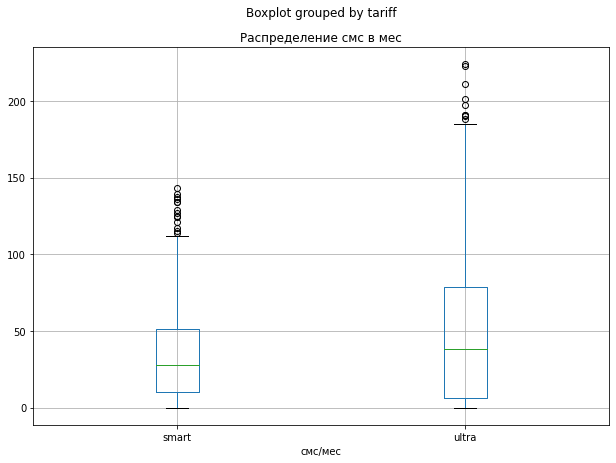

In [75]:
data.boxplot('messages_count', by='tariff', figsize=(10,7))
plt.xlabel('смс/мес')
plt.title('Распределение смс в мес')

Судя по графику, пользователи тарифа Ультра пользуются смсками больше, чем пользователи Смарта, медианное значение на ультре больше смарта, и в целом квартили и выбросы по смскам на Ультре больше, чем на Смарте.

#### Гистограмма по траффику

count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_sum, dtype: float64

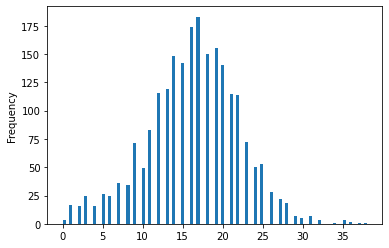

In [76]:
data.query('tariff == "smart"')['gb_sum'].plot(kind='hist', bins=100)
data.query('tariff == "smart"')['gb_sum'].describe()

count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_sum, dtype: float64

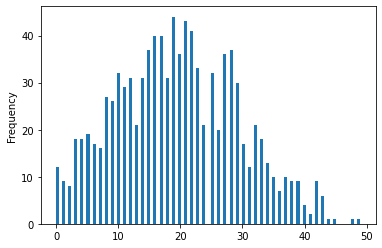

In [77]:
data.query('tariff == "ultra"')['gb_sum'].plot(kind='hist', bins=100)
data.query('tariff == "ultra"')['gb_sum'].describe()

Text(0.5, 1.0, 'Распределение Гб в мес')

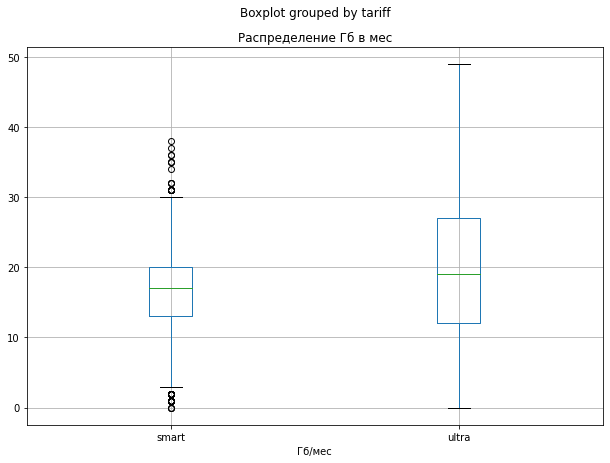

In [78]:
data.boxplot('gb_sum', by='tariff', figsize=(10,7))
plt.xlabel('Гб/мес')
plt.title('Распределение Гб в мес')

Расход по траффику на Ультре больше Смарта. Медианное значение примерно на одном уровне в 17-18 Гб.
Но по гистограммам видно, что пользователи тарифа Ультра расходуют больше гигабайт, чем на Смарт, зато на Смарте лимит в 15Гб в мес успешно преодолевается пользователями, и они докупают мегабайты сверх пакета

### Вывод по анализу данных



- Расход по траффику на Ультре больше Смарта. Медианное значение примерно на одном уровне в 17-18 Гб. Но по гистограммам видно, что пользователи тарифа Ультра расходуют больше гигабайт, чем на Смарт, зато на Смарте лимит в 15Гб в мес успешно преодолевается пользователями, и они докупают мегабайты сверх пакета

В среднем видно по тарифу Смарт:

- Минуты среднее значение 418 минут, в пакете включено 500
- Смски 34 шт, в пакете включено 50
- Интернет 17 Гб в пакете 15 (интерент докупается)

По тарифу Ультра:

- Минут среднее значение 527, в пакете 3000
- Смски 50, в пакете 1000
- Интернет 19,49 Гб, в пакете 30 Гб

Пользователи тарифа Смарт докупают недостающий траффик, в то время, как пользователям тарифа Ультра в среднем хватает пакета услуг на месяц. 

Медианное значение по оплате у тарифа Ультра больше, чем у тарифа Смарт примерно в два раза, можно сказать, что тариф Ультра выгоднее для оператора связи.

Расход по траффику на Ультре больше Смарта. Медианное значение примерно на одном уровне в 17-18 Гб.
Но по гистограммам видно, что пользователи тарифа Ультра расходуют больше гигабайт, чем на Смарт, зато на Смарте лимит в 15Гб в мес успешно преодолевается пользователями, и они докупают мегабайты сверх пакета

Судя по графикам, пользователи тарифа Ультра пользуются смсками больше, чем пользователи Смарта, медианное значение на Ультре больше Смарта, и в целом квартили и выбросы по смскам на Ультре больше, чем на Смарте

Большинство пользователей не расходуют пакеты смс, львиная доля вообще не пользуется смсками, но также есть пользователи, которые активно ими пользуются, и на тарифе смарт превышают пакет смс, в то время как на тарифе Ульта пакет в 1000 смс ни кем не расходуется

Из гистограмм видны нулевые значения расходования пакета минут - есть пользователи, которые не пользуются связью.

## Проверка гипотез

###  средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов Смарт и Ультра не различается 
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается

In [79]:
# Установка порога значимости
alpha = 0.05

In [80]:
# для проверки гипотезы выделим в отдельные переменные столбцы с оплатой по тарифам
smart_month_payment = data.query('tariff == "smart"')['total_pay']
ultra_month_payment = data.query('tariff == "ultra"')['total_pay']

In [81]:
# Делаем t-тест Стьюдента 
# для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

results = st.ttest_ind(
    smart_month_payment, 
    ultra_month_payment)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


In [82]:
print('Средняя выручка по тарифу Smart:', smart_month_payment.mean().round(2))
print('Средняя выручка по тарифу Ultra:', ultra_month_payment.mean().round(2))

Средняя выручка по тарифу Smart: 1289.64
Средняя выручка по тарифу Ultra: 2070.03


Средняя выручка по тарифам весьма различается

###  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

- Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы и других городов не различается 
- Альтернативная гипотеза H₁: Средняя выручка пользователей из Москвы и других городов различается 

In [83]:
#Для проверки гипотез разделим пользователей Москвы и не Москвы
data['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [84]:
data_moscow = data.query('city == "Москва"')['total_pay']
data_other_city = data.query('city != "Москва"')['total_pay']

In [85]:
# Делаем t-тест Стьюдента 
# для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

results = st.ttest_ind(
    data_moscow, 
    data_other_city)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [86]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


In [87]:
print('Средняя выручка жителя Москвы:', data_moscow.mean().round(2))
print('Средняя выручка жителя другого города:', data_other_city.mean().round(2))

Средняя выручка жителя Москвы: 1546.71
Средняя выручка жителя другого города: 1524.73


**Правка**

Гипотеза о том, что в Москве платят за связь столько же , сколько и в других городах ~~подтвердилась~~ не отвергнута

### Вывод по гипотезам

Проверили две гипотезы

- Средняя выручка пользователей тарифов Смарт и Ультра не различается.

~~Эта гипотеза не подтвердилась: ~~
<br>В результате проверки этой гипотезы пришли к мнению: <b>отвергаем</b>

Среднее по Смарт 1289.64 руб. Среднее по тарифу Ультра 2070.03 руб

- Средняя выручка пользователей из Москвы и других городов не различается.

~~Эта гипотеза подтвердилась:~~
<br>В результате проверки этой гипотезы пришли к мнению: <b>отвергнуть не удалось</b>

Средняя выручка жителя Москвы: 1546.71

Средняя выручка жителя другого города: 1524.73


## Общий вывод

В процессе работы над проэктом сделали следующее:

1. подготовили данные: 
- Данные были приведены к нужным типам
- Звонки были округлены до минут согласно тарифам оператора
- Исправлены ошибки
- Мегабайты пересчитаны в Гигабайты с округлением в большую сторону за месяц
- Сделан датасет, в котором посчитана выручка и переплата по каждому пользователю на основе созданных ранее сводных таблиц
2. Сделан анализ данных:

В среднем видно по тарифу Смарт:

- Минуты среднее значение 418 минут, в пакете включено 500
- Смски 34 шт, в пакете включено 50
- Интернет 17 Гб в пакете 15 (интерент докупается)

По тарифу Ультра:

- Минут среднее значение 527, в пакете 3000
- Смски 50, в пакете 1000
- Интернет 19,49 Гб, в пакете 30 Гб

- Медианное значение по оплате у тарифа Ультра больше, чем у тарифа Смарт примерно в два раза, можно сказать, что тариф Ультра выгоднее для оператора связи.При этом суммарно за год выручки с тарифа Смарт больше, нежели с тарифа Ультра, за счет количества абонентов Смарт

- Пользователи тарифа Смарт докупают недостающий траффик, в то время, как пользователям тарифа Ультра в среднем хватает пакета услуг на месяц. 

- Расход по траффику на Ультре больше Смарта. Медианное значение примерно на одном уровне в 17-18 Гб. Но по гистограммам видно, что пользователи тарифа Ультра расходуют больше гигабайт, чем на Смарт, зато на Смарте лимит в 15Гб в мес успешно преодолевается пользователями, и они докупают мегабайты сверх пакета

- Смсками пользователи тарифа Ультра пользуются больше, чем пользователи Смарта. Но большинство пользователей не расходуют пакеты смс, львиная доля вообще не пользуется смсками, но также есть пользователи, которые активно ими пользуются, и на тарифе Смарт превышают пакет смс, в то время как на тарифе Ульта пакет в 1000 смс ни кем не расходуется

- Пакет минут на тарифах:в процессе анализа данных выявили, что есть пользователи, которые не пользуются связью.

3. Проверены гипотезы:
 3. 1. Средняя выручка пользователей тарифов Смарт и Ультра не различается.
~~Эта гипотеза не подтвердилась: ~~
<br>В результате проверки этой гипотезы пришли к мнению: <b>отвергаем</b>

- Среднее по Смарт 1289.64 руб. 
- Среднее по тарифу Ультра 2070.03 руб

 3. 2. Средняя выручка пользователей из Москвы и других городов не различается.
~~Эта гипотеза подтвердилась:~~
<br>В результате проверки этой гипотезы пришли к мнению: <b>отвергнуть не удалось</b>
- Средняя выручка жителя Москвы: 1546.71
- Средняя выручка жителя другого города: 1524.73




In [88]:
# Количество пользователей тарифа Смарт
smart_user_count = len(data.query('tariff == "smart"')['user_id'].unique())
smart_user_count

351

In [89]:
# Количество пользователей тарифа Ультра
ultra_user_count = len(data.query('tariff == "ultra"')['user_id'].unique())
ultra_user_count

149

In [90]:
# check
data.columns

Index(['user_id', 'month', 'calls', 'duration', 'messages_count',
       'session_count', 'mb_sum', 'age', 'churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff', 'churn_month', 'reg_month',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name', 'gb_sum', 'gb_per_month_included', 'overpayment_tariff',
       'total_pay'],
      dtype='object')

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

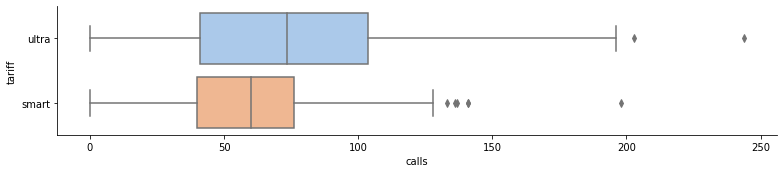

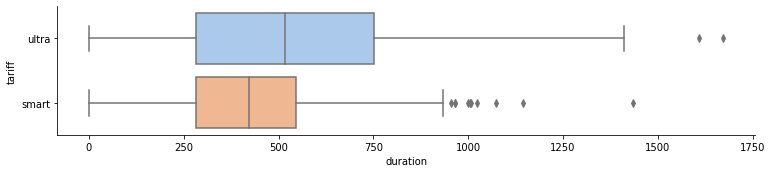

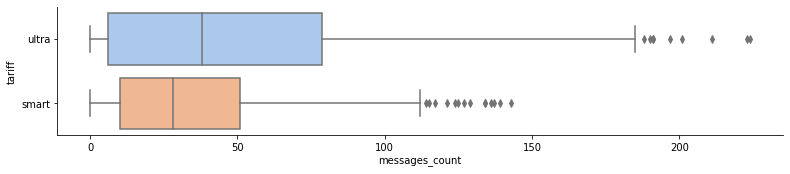

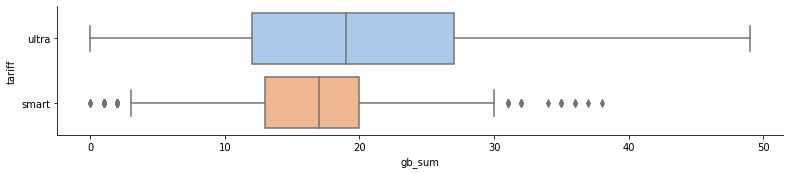

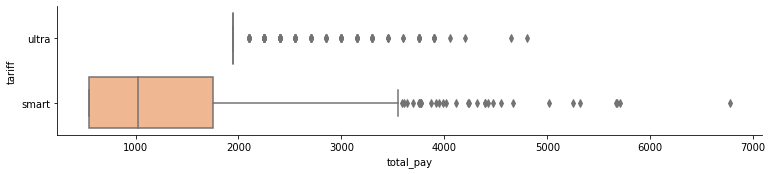

In [92]:

for column in ['calls', 'duration', 'messages_count',
        'gb_sum',  'total_pay']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data= data, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

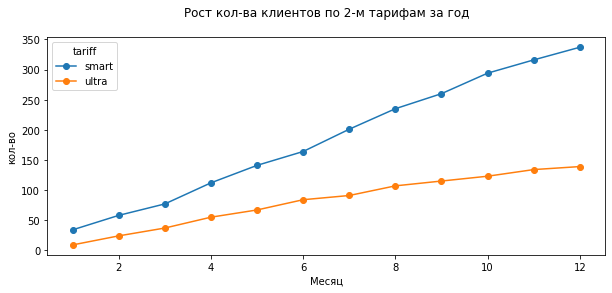

In [93]:
(data
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

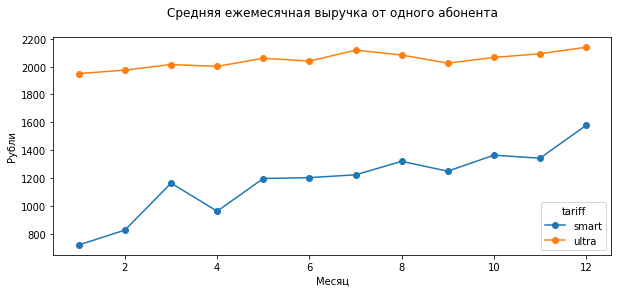

In [94]:
(data
 .pivot_table(index='tariff', columns='month', values='total_pay', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

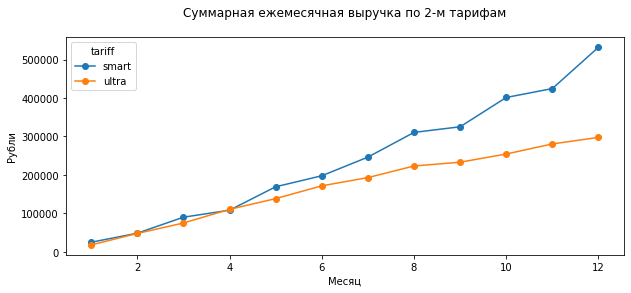

In [95]:
(data
 .pivot_table(index='tariff', columns='month', values='total_pay', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

# выручка от смартов уже в два раза выше выручки от ультры, но есть опасность - убегут клиенты смарт от такой счастливой жизни к конкурентам :)

In [96]:
# на скорую руку
df_users = pd.read_csv('/datasets/users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


# отток усиливается?

# мы не ограничены в рекомендациях бизнесу только двумя тарифами, если мы видим риски для бизнеса мы можем предложить и третий и четвертый вариант развития тарифной политики